## Loading Libraries and data set

In [1]:
import pandas as pd
import numpy as np

In [3]:
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv("C:\\Users\\HP\\Desktop\\Projects\\Recommendation Engine Project\\goodreadData_edited_2.csv")


df.head()


,Desc,Unnamed: 1,author,genre,image_link,rating,Publisher,title
0,We know that power is shifting: From West to E...,NaN,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,Basic Books,The End of Power: From Boardrooms to Battlefie...
1,Following the success of The Accidental Billio...,NaN,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,Harper Collins,"Console Wars: Sega, Nintendo, and the Battle t..."
2,How to tap the power of social software and ne...,NaN,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Wiley,Trust Agents: Using the Web to Build Influence...
3,William J. Bernstein is an American financial ...,NaN,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,McGraw Hill,The Four Pillars of Investing
4,Amazing book. And I joined Steve Jobs and many...,NaN,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Penguin,Made in Japan: Akio Morita and Sony


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 8 columns):
Desc          2210 non-null object
Unnamed: 1    0 non-null float64
author        2210 non-null object
genre         2210 non-null object
image_link    2210 non-null object
rating        2210 non-null float64
Publisher     2210 non-null object
title         2210 non-null object
dtypes: float64(2), object(6)
memory usage: 138.2+ KB


In [5]:
df.shape

(2210, 8)

In [6]:
df.isnull().sum()

Desc             0
Unnamed: 1    2210
author           0
genre            0
image_link       0
rating           0
Publisher        0
title            0
dtype: int64

In [7]:
df.drop("Unnamed: 1",axis=1)

,Desc,author,genre,image_link,rating,Publisher,title
0,We know that power is shifting: From West to E...,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,Basic Books,The End of Power: From Boardrooms to Battlefie...
1,Following the success of The Accidental Billio...,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,Harper Collins,"Console Wars: Sega, Nintendo, and the Battle t..."
2,How to tap the power of social software and ne...,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Wiley,Trust Agents: Using the Web to Build Influence...
3,William J. Bernstein is an American financial ...,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,McGraw Hill,The Four Pillars of Investing
4,Amazing book. And I joined Steve Jobs and many...,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Penguin,Made in Japan: Akio Morita and Sony
5,In the tradition of Phil Knight's Shoe Dog com...,Marc Randolph,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.28,Endeavour,That Will Never Work: The Birth of Netflix and...
6,"Gregory Zuckerman, the bestselling author of T...",Gregory Zuckerman,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.12,Penguin,The Man Who Solved the Market: How Jim Simons ...
7,"From bestselling writer David Graeber, a power...",David Graeber,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.95,Allen Lane,Bullshit Jobs: A Theory
8,You aspire to lead with greater impact. The pr...,Herminia Ibarra,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.91,Harvard Business Press,"Act Like a Leader, Think Like a Leader"
9,Entrepreneurs often suffer from ”superhero syn...,Chris C. Ducker,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.92,Stanford University Press,Virtual Freedom: How to Work with Virtual Staf...


## Data Visulalization

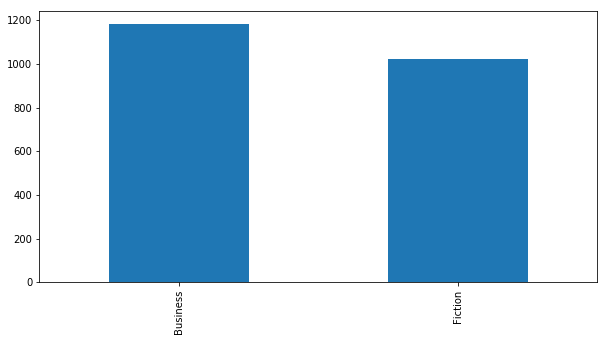

In [8]:
# Genre distribution
df['genre'].value_counts().plot(x = 'genre', y ='count', kind = 'bar', figsize = (10,5)  )

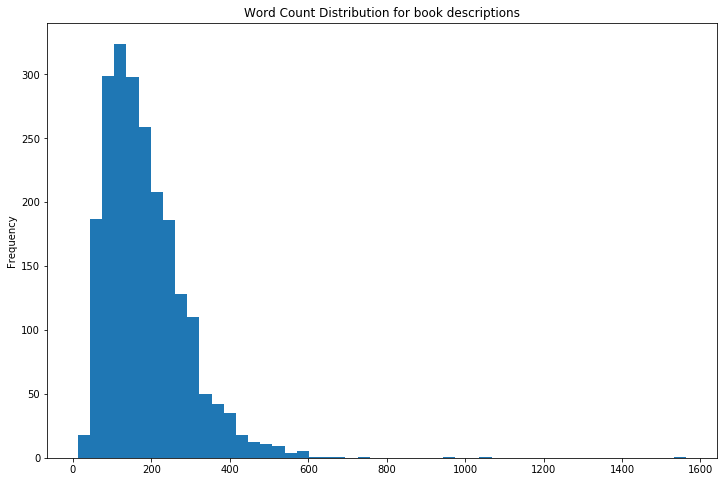

In [9]:
# Calculating the word count for book description
df['word_count'] = df['Desc'].apply(lambda x: len(str(x).split()))# Plotting the word count
df['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for book descriptions')


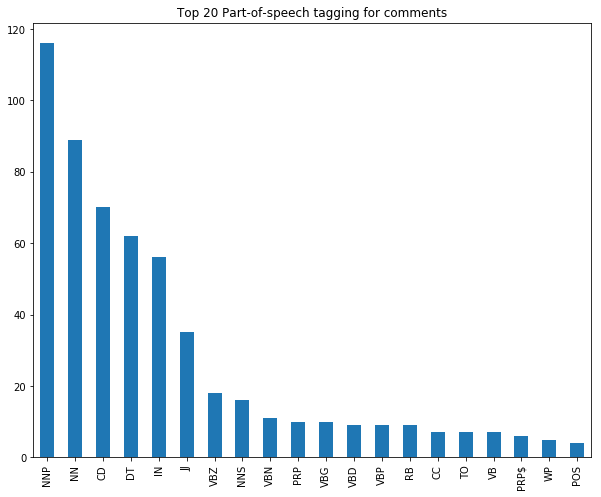

In [10]:
from textblob import TextBlob
blob = TextBlob(str(df['Desc']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 20 Part-of-speech tagging for comments")

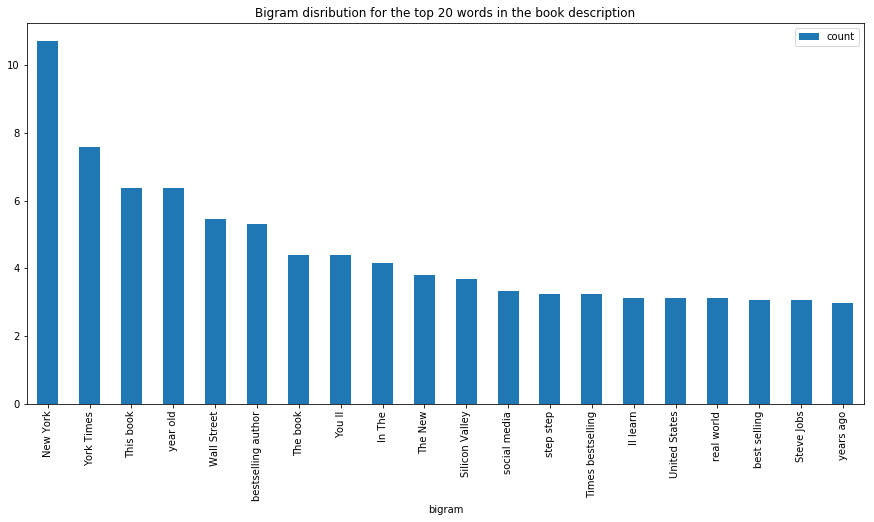

In [11]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['Desc'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

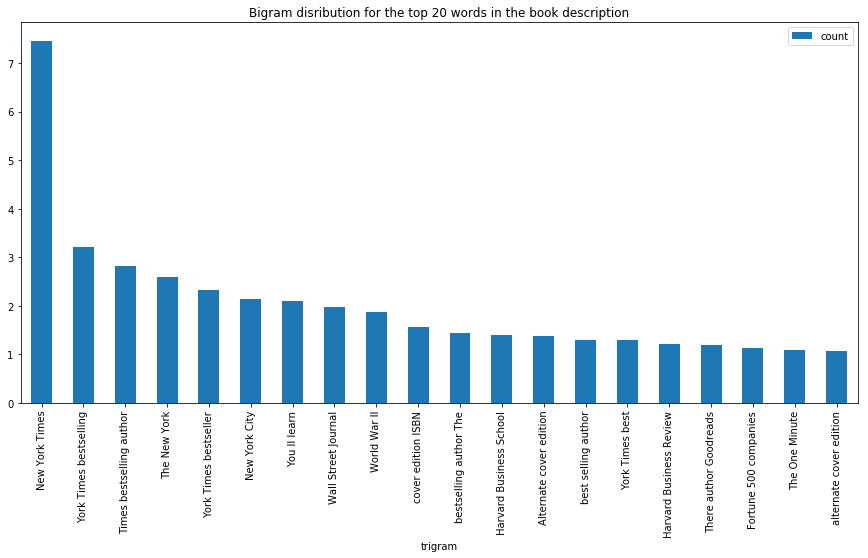

In [12]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['Desc'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
trigram = trigram.head(20)

#Plotting the trigramn distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

In [13]:
# Function for removing NonAscii characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

# Function for converting into lower case
def make_lower_case(text):
    return text.lower()

# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

# Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Applying all the functions in description and storing as a cleaned_desc
df['cleaned_desc'] = df['Desc'].apply(_removeNonAscii)
df['cleaned_desc'] = df.cleaned_desc.apply(func = make_lower_case)
df['cleaned_desc'] = df.cleaned_desc.apply(func = remove_stop_words)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_punctuation)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_html)

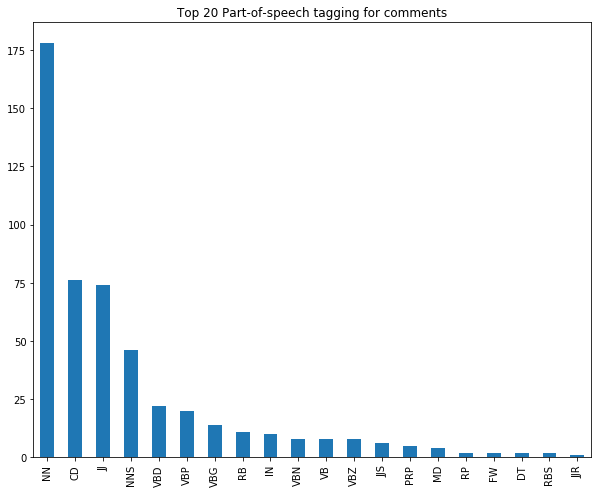

In [14]:
from textblob import TextBlob
blob = TextBlob(str(df['cleaned_desc']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 20 Part-of-speech tagging for comments")

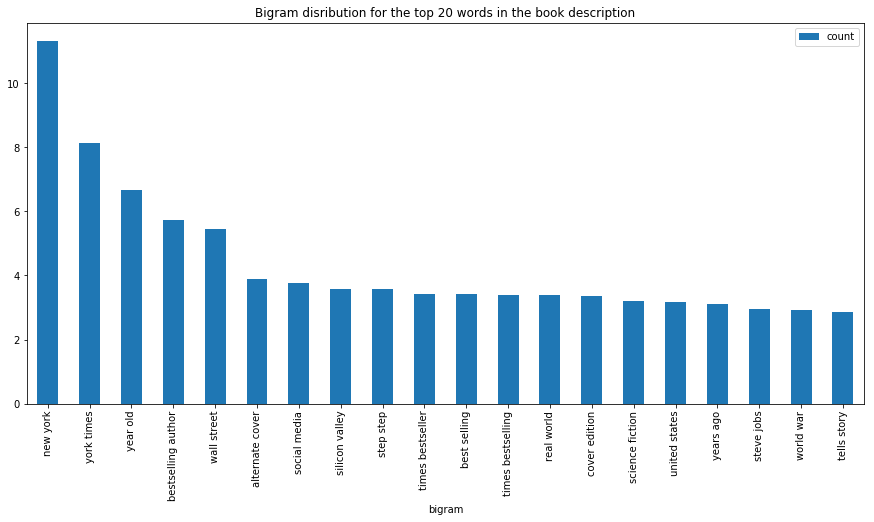

In [15]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['cleaned_desc'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

## Recommendation based on book title

In [16]:
# Function for recommending books based on Book title. It takes book title and genre as an input.def recommend(title, genre):
# Matching the genre with the dataset and reset the index
from sklearn.metrics.pairwise import cosine_similarity
def recommend_title(title, genre):
    data = df.loc[df['genre'] == genre]  
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['title'])
    
    #Converting the book title into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['title'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
       
    idx = indices[title]# Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))# Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)# Scores of the 5 most similar books 
    sig = sig[1:6]# Book indicies
    book_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
    rec = data[['title', 'image_link']].iloc[book_indices]
       
    # It reads the top 5 recommended book urls and print the images
    
    for i in rec['title']:
        print(i)
    
    for i in rec['image_link']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        plt.figure()
        print(plt.imshow(img))   
        
      
    

    

To Kill a Mockingbird
1984
Harry Potter and the Sorcerer's Stone
Animal Farm
The Hunger Games
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


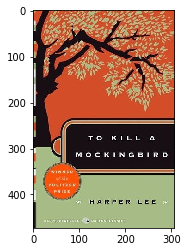

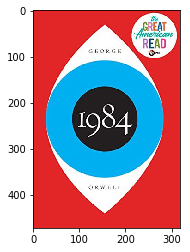

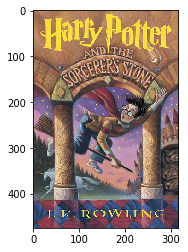

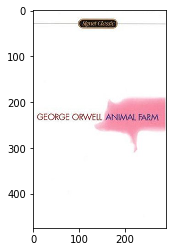

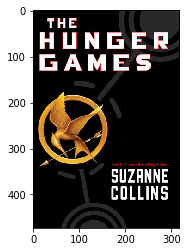

In [17]:
recommend_title("The Great Gatsby", "Fiction")

The End of Power: From Boardrooms to Battlefields and Churches to States, Why Being In Charge Isn't What It Used to Be
Console Wars: Sega, Nintendo, and the Battle that Defined a Generation
Trust Agents: Using the Web to Build Influence, Improve Reputation, and Earn Trust
Made in Japan: Akio Morita and Sony
That Will Never Work: The Birth of Netflix and the Amazing Life of an Idea
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


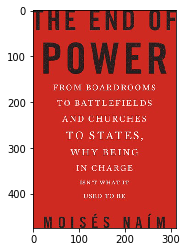

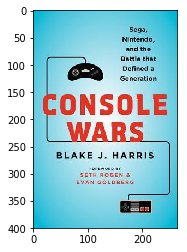

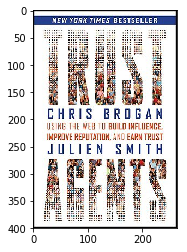

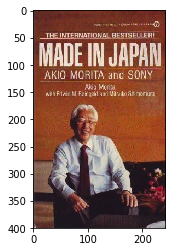

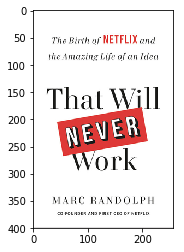

In [18]:
recommend_title("The Four Pillars of Investing", "Business")

## Recommendation based on book description

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
def recommend_desc(title, genre):
    global rec
    # Matching the genre with the dataset and reset the index
    data = df.loc[df['genre'] == genre]  
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['title'])
    
    #Converting the book description into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['cleaned_desc'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
       
    idx = indices[title]# Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))# Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)# Scores of the 5 most similar books 
    sig = sig[1:6]# Book indicies
    book_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
    rec = data[['title', 'image_link']].iloc[book_indices]
    
    # It reads the top 5 recommend book url and print the images
    for i in rec['title']:
        print(i)
    
    for i in rec['image_link']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        plt.figure()
        print(plt.imshow(img))

The Third Door: The Wild Quest to Uncover How the World's Most Successful People Launched Their Careers
Abundance: The Future Is Better Than You Think
The Sales Bible: The Ultimate Sales Resource
The End of Power: From Boardrooms to Battlefields and Churches to States, Why Being In Charge Isn't What It Used to Be
Console Wars: Sega, Nintendo, and the Battle that Defined a Generation
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


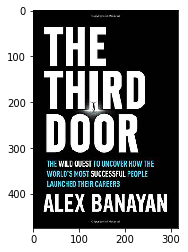

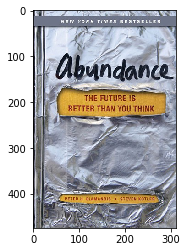

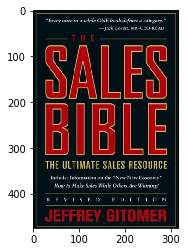

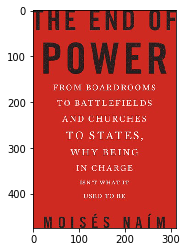

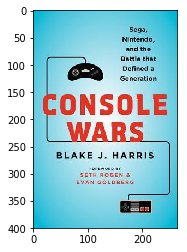

In [20]:
recommend_desc("The Four Pillars of Investing", "Business")

Red Dragon
Practical Magic
Darkly Dreaming Dexter
Wolf Hall
Fifty Shades of Grey
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


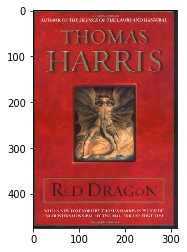

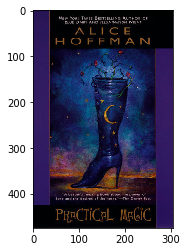

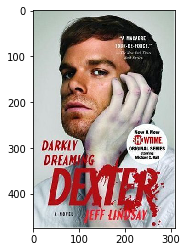

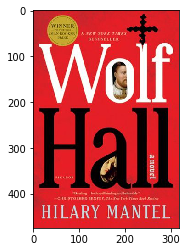

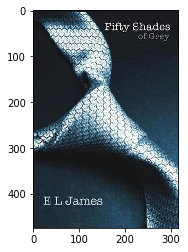

In [21]:
recommend_desc("Hannibal", "Fiction")